# Variable creation
In this notebook the variables that will be used in the Multiple Linear Regression model are created, saved and its distribution histograms are plotted. Specifically, the centrality measures that inform us how much the node is important for the network, are calculated. Then simple linear models are created. The rest of regression models is implemented in R.

TO JEST DALEJ ANALIZA MONTE CARLO TYLKO TERAZ INNE MIARY
Najpeirw popatrzyłam na praca 6, żeby zobaczyć czy ta sieć mocno się zmienia każdego dnia. Wyszło mi, że tak. Ponadto okazało się, że większość kontaktów to kontakty jednorazowe, dlatego zrobiłam ważoną sieć z ostantniego dnia i na jej podstawie liczyłam te wszystkie miary
W tym pliku tworzę sobie wagi do każdego z kontaktów w grafie, tworząc w ten sposób sieć statyczną. Każda z wag odpowiada liczbie kontaktów na połączeniu. Następnie redukuję ten graf i tworzę nowy, taki w którym wagi przekraczją co najmniej liczbę 5 i wizualizuję go. 

Następnie sprawdzam czy różne miary centralności mają jakiś wpływ na to, że wierzchołek przekaże dalej epidemię- robiąc regresję liniową między miarą, a chance

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import statistics
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
% store -r contacts

In [4]:
Graph=nx.Graph()
for i in contacts:
    if Graph.has_edge(i[1],i[2])==False:
        Graph.add_edge(i[1],i[2],weight=1)
    else:
        Graph[i[1]][i[2]]['weight']+=1

In [5]:
#graf z krawędziami powyżej wagi a na podstawie  Graph
%store -r G
edges,weights = zip(*nx.get_edge_attributes(Graph,'weight').items())
a=3
new_edges=[]
new_weights=[]
for i in range(0,len(edges)):
    if weights[i]>=a: #biorę tylko te krawędzie, na których było więcej niż a kontaktów
        new_weights.append(weights[i])
        new_edges.append(edges[i])
        
limited_G=nx.Graph()

for i in list(Graph.nodes):
    limited_G.add_node(i)
    limited_G.nodes[i]['chance']=G.nodes[i]['chance']
for i in range(0,len(new_edges)):
    limited_G.add_edge(new_edges[i][0],new_edges[i][1],weight=new_weights[i])

In [5]:
#print('normalnie liczba krawędzi',G.number_of_edges(),'liczba krawędzi bez tych o w=1:',limited_G.number_of_edges())
print('normalnie liczba krawędzi',755,'liczba krawędzi bez tych o w=1:',487,'liczba krawędzi bez tych o w=2:',
     389)

normalnie liczba krawędzi 755 liczba krawędzi bez tych o w=1: 487 liczba krawędzi bez tych o w=2: 389


'a=plt.gcf()\na.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/net_vis_all.eps")\nplt.show()'

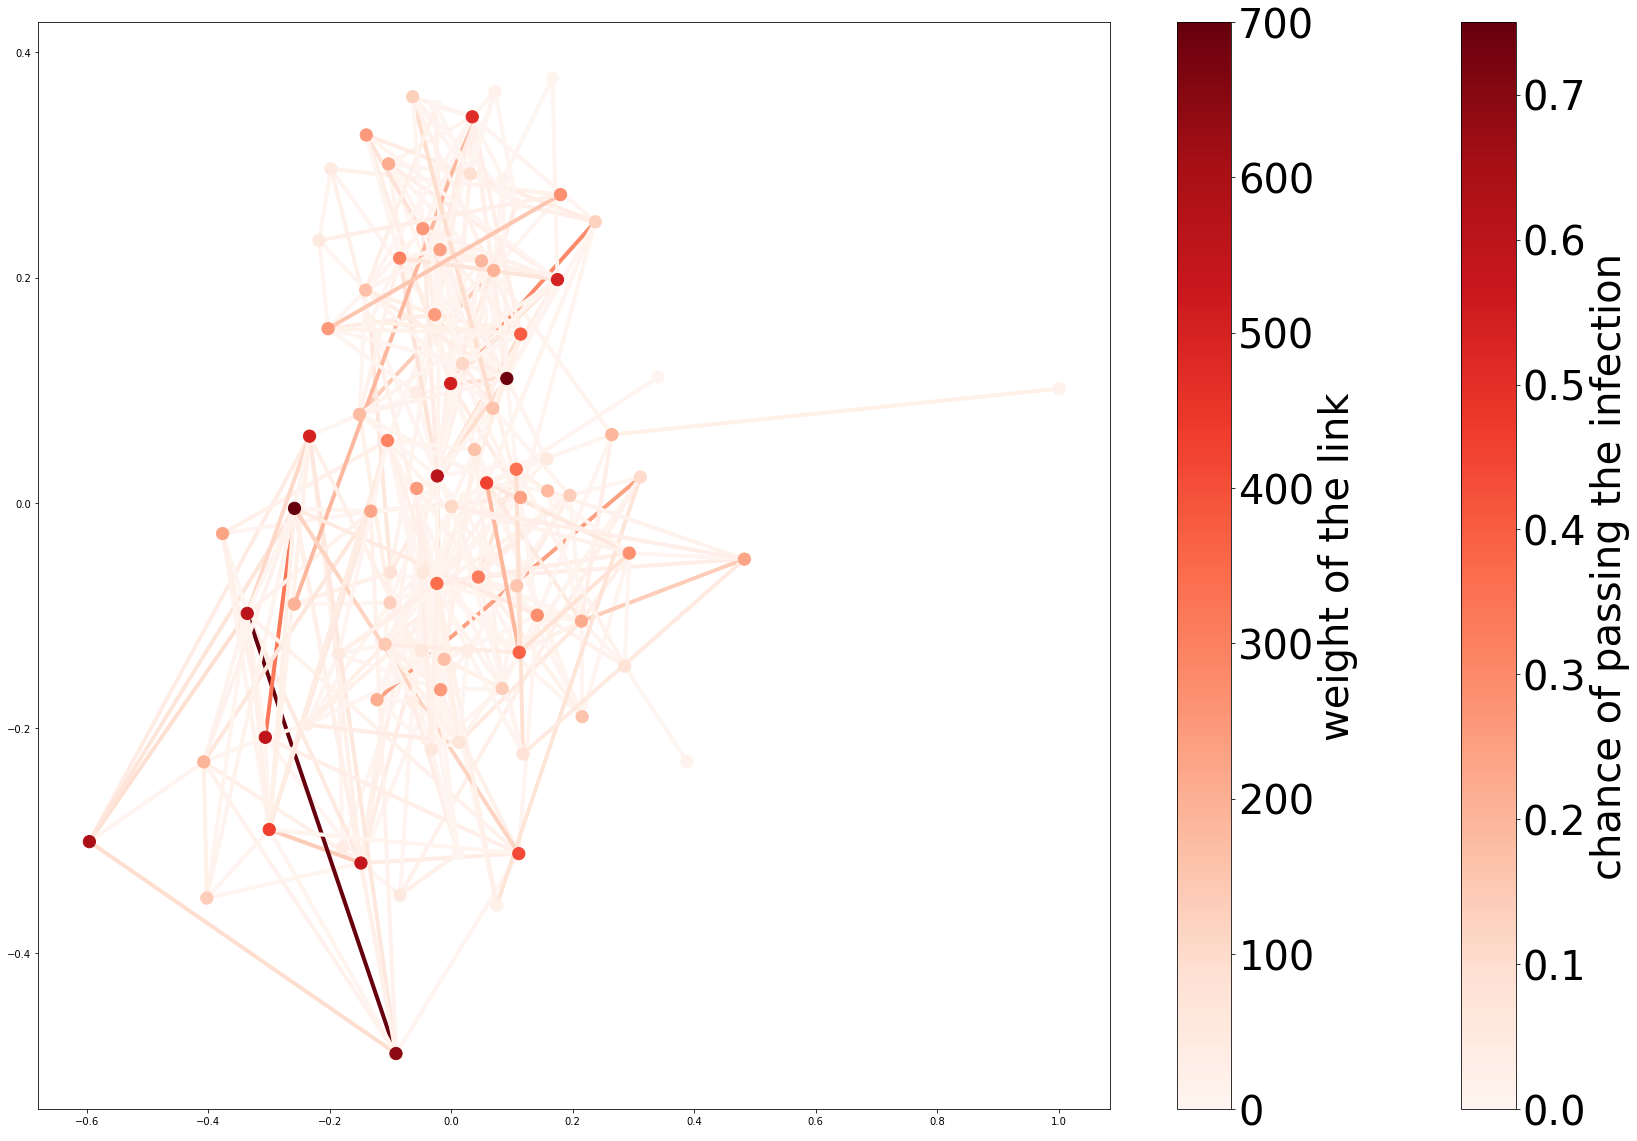

In [6]:
plt.figure(figsize=(30,20)) 
edges,weights = zip(*nx.get_edge_attributes(limited_G,'weight').items())
#pos = nx.spring_layout(limited_G)
pos=nx.kamada_kawai_layout(limited_G)
#pos=nx.circular_layout(limited_G)
#plt.figure(figsize=(30,20)) 

nx.draw_networkx_nodes(limited_G,pos,node_color=list(nx.get_node_attributes(limited_G,'chance').values()),
        node_size=150,cmap=plt.cm.Reds)

nx.draw_networkx_edges(limited_G,pos, width=4,edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Reds,
              norm=plt.Normalize(vmin = a, vmax=500))
f=40

sm2 = plt.cm.ScalarMappable(cmap=plt.cm.Reds,norm=plt.Normalize(vmin = 0, vmax=0.75))
sm2._A = []
cb2=plt.colorbar(sm2)
cb2.ax.tick_params(labelsize=f)
cb2.set_label( label="chance of passing the infection",fontsize=f)

sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds,norm=plt.Normalize(vmin = 0, vmax=700))
sm._A = []
cb=plt.colorbar(sm)
cb.ax.tick_params(labelsize=f)
cb.set_label( label="weight of the link",fontsize=f)

"""a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/net_vis_all.eps")
plt.show()"""

#nagle po prostu przestało działać

Wykres pokazujący połączenia na koniec między wierzchołkami, im ciemniejsze połączenie tym częściej był na nim kontakt, im jaśniejszy wierzchołek tym ma większą szansę przekazania infekcji. Na wykresie pokazane tylko te krawędzie, które mają wiekszą wagę niż 5. 
Wnioski: Wydaje się, że te wierzchołki o szczególnym potencjale epidemiologicznym mają całkiem sporo połączeń między sobą i to takich o dużej częstotliwośći
Prawdopodbnie jak zarażę wierzchołek o dużej szansie on najprawdopodobniej zaraża inny wierzchołek o dużej szansie tak doprowadzacjąc do epidemii.

WIERZCHOŁEK O DUŻEJ ZARAŹLIWOŚCI TO TAKI, KTÓRY MA DUŻO ZARAŹLIWYCH SĄSIADÓW... (tak widać na wykresie...)

BADANIE MIAR CENTRALNOŚCI I ICH ZALEŻNOŚCI Z CHANCE

In [6]:
a=nx.clustering(Graph, list(Graph.nodes),weight='weight')

In [7]:
for i in a:
    G.nodes[i]['clustering coefficient']=a[i]

In [8]:
#waga u mnie coś pozytywnego im większa tym lepsza w algorytmie na temat betweeness jest odwrotnie waga to dystans,
#zatem trzeba wziąć odwrotności tych wag
for i in list(Graph.edges):
    Graph[i[0]][i[1]]['weight']=1/Graph[i[0]][i[1]]['weight']
    
b = nx.betweenness_centrality(Graph, weight= 'weight', normalized=False)
for i in b:
    G.nodes[i]['betweeness_centrality']=b[i]

In [9]:
d=nx.degree(Graph, list(Graph.nodes),weight='weight') #degree centrality
for i in d:
    G.nodes[i[0]]['degree centrality']=i[1]

In [10]:
close=nx.closeness_centrality(Graph,distance='weight')
for i in close:
    G.nodes[i]['closeness centrality']=close[i]


In [11]:
eigen_centr=nx.eigenvector_centrality(Graph,weight='weight')
for i in eigen_centr:
    G.nodes[i]['eigenvector centrality']=eigen_centr[i]

In [12]:
random_walk=nx.current_flow_betweenness_centrality(Graph,weight='weight')
for i in random_walk:
    G.nodes[i]['random walk centrality']=random_walk[i]

In [13]:
inf_centr=nx.information_centrality(Graph, weight='weight')
for i in inf_centr:
    G.nodes[i]['information centrality']=inf_centr[i]

In [14]:
harm=nx.harmonic_centrality(Graph, distance='weight')
for i in harm:
    G.nodes[i]['harmonic centrality']=harm[i]

In [7]:
%store -r G
between=[]
chance=[]
ids=[]
clustering=[]
d_centrality=[]
close=[]
eigen=[]
walk=[]
inf=[]
harmonic=[]
k8=[]
k3=[]
k5=[]
k_end=[]
for i in list(G.nodes):
    ids.append(G.nodes[i]['Id'])
    between.append(G.nodes[i]['betweeness_centrality'])
    chance.append(G.nodes[i]['chance'])
    clustering.append(G.nodes[i]['clustering coefficient'])
    d_centrality.append(G.nodes[i]['degree centrality'])
    close.append(G.nodes[i]['closeness centrality'])
    eigen.append(G.nodes[i]['eigenvector centrality'])
    walk.append(G.nodes[i]['random walk centrality'])
    inf.append(G.nodes[i]['information centrality'])
    harmonic.append(G.nodes[i]['harmonic centrality'])
""""   k8.append(G.nodes[i]['k_9'])
    k3.append(G.nodes[i]['k_3'])
    k5.append(G.nodes[i]['k_6'])
    k_end.append(G.nodes[i]['k'])"""

'"   k8.append(G.nodes[i][\'k_9\'])\n    k3.append(G.nodes[i][\'k_3\'])\n    k5.append(G.nodes[i][\'k_6\'])\n    k_end.append(G.nodes[i][\'k\'])'

In [13]:
b_c_df=pd.DataFrame({'id':ids,'between':between,'chance':chance,'cluster':clustering,'d_centrality':d_centrality,
                    'close':close,'eigen':eigen,'walk':walk,'inf':inf,'harmonic':harmonic,
                     'k8':k8,'k3':k3,'k5':k5,'k_end':k_end})

In [17]:
regressor = LinearRegression()  
b=b_c_df['between'].values.reshape(-1,1)
Y=b_c_df['chance'].values.reshape(-1,1)
regressor.fit(b, Y) #training the algorithm
print('regression formula for betweeness centrality: chance=',regressor.intercept_,'+',regressor.coef_,'*between',
      'coefficient of determination:', regressor.score(b,Y))
Y_b=regressor.intercept_+regressor.coef_*b

regressor2 = LinearRegression()  
c=b_c_df['cluster'].values.reshape(-1,1)
regressor2.fit(c, Y) #training the algorithm
print('regression formula for clustering coeffcient: chance=',regressor2.intercept_,'+',regressor2.coef_,'*clustering',
      'coefficient of determination:', regressor2.score(c,Y))
Y_c=regressor2.intercept_+regressor2.coef_*c

regressor3 = LinearRegression()  
d=b_c_df['d_centrality'].values.reshape(-1,1)
regressor3.fit(d, Y) #training the algorithm
print('regression formula for degree centrality: chance=',regressor3.intercept_,'+',regressor3.coef_,'*degree centrality',
      'coefficient of determination:', regressor3.score(d,Y))
Y_d=regressor3.intercept_+regressor3.coef_*d

regressor4 = LinearRegression()  
cl=b_c_df['close'].values.reshape(-1,1)
regressor4.fit(cl, Y) #training the algorithm
print('regression formula for closeness centrality: chance=',regressor4.intercept_,'+',regressor4.coef_,'*closeness centrality',
      'coefficient of determination:', regressor4.score(cl,Y))
Y_cl=regressor4.intercept_+regressor4.coef_*cl

regressor5 = LinearRegression()  
e=b_c_df['eigen'].values.reshape(-1,1)
regressor5.fit(e, Y) #training the algorithm
print('regression formula for eigen vector centrality: chance=',
      regressor5.intercept_,'+',regressor5.coef_,'*eigen vector centrality',
      'coefficient of determination:', regressor5.score(e,Y))
Y_e=regressor5.intercept_+regressor5.coef_*e

regressor6 = LinearRegression()  
w=b_c_df['walk'].values.reshape(-1,1)
regressor6.fit(w, Y) #training the algorithm
print('regression formula for random walk centrality: chance=',
      regressor6.intercept_,'+',regressor6.coef_,'*random walk centrality',
      'coefficient of determination:', regressor6.score(w,Y))
Y_w=regressor6.intercept_+regressor6.coef_*w

regressor7 = LinearRegression()  
i=b_c_df['inf'].values.reshape(-1,1)
regressor7.fit(i, Y) #training the algorithm
print('regression formula for information centrality: chance=',
      regressor7.intercept_,'+',regressor7.coef_,'*information centrality',
      'coefficient of determination:', regressor7.score(i,Y))
Y_i=regressor7.intercept_+regressor7.coef_*i

regressor8 = LinearRegression()  
h=b_c_df['harmonic'].values.reshape(-1,1)
regressor8.fit(h, Y) #training the algorithm
print('regression formula for harmonic centrality: chance=',
      regressor8.intercept_,'+',regressor8.coef_,'*harmonic centrality',
      'coefficient of determination:', regressor8.score(h,Y))
Y_h=regressor8.intercept_+regressor8.coef_*h

regression formula for betweeness centrality: chance= [0.1783504] + [[0.00028025]] *between coefficient of determination: 0.16805678531366375
regression formula for clustering coeffcient: chance= [0.09988706] + [[25.72266289]] *clustering coefficient of determination: 0.23047726144499536
regression formula for degree centrality: chance= [0.10233828] + [[0.01492544]] *degree centrality coefficient of determination: 0.09936100093266953
regression formula for closeness centrality: chance= [-0.22466378] + [[0.06308696]] *closeness centrality coefficient of determination: 0.35764918076554997
regression formula for eigen vector centrality: chance= [0.13521623] + [[0.95124569]] *eigen vector centrality coefficient of determination: 0.0647352291602723
regression formula for random walk centrality: chance= [0.10163673] + [[3.54761361]] *random walk centrality coefficient of determination: 0.11194080858907096
regression formula for information centrality: chance= [-0.03225857] + [[8.07720977]] *

Text(0.5,1,'Curve')

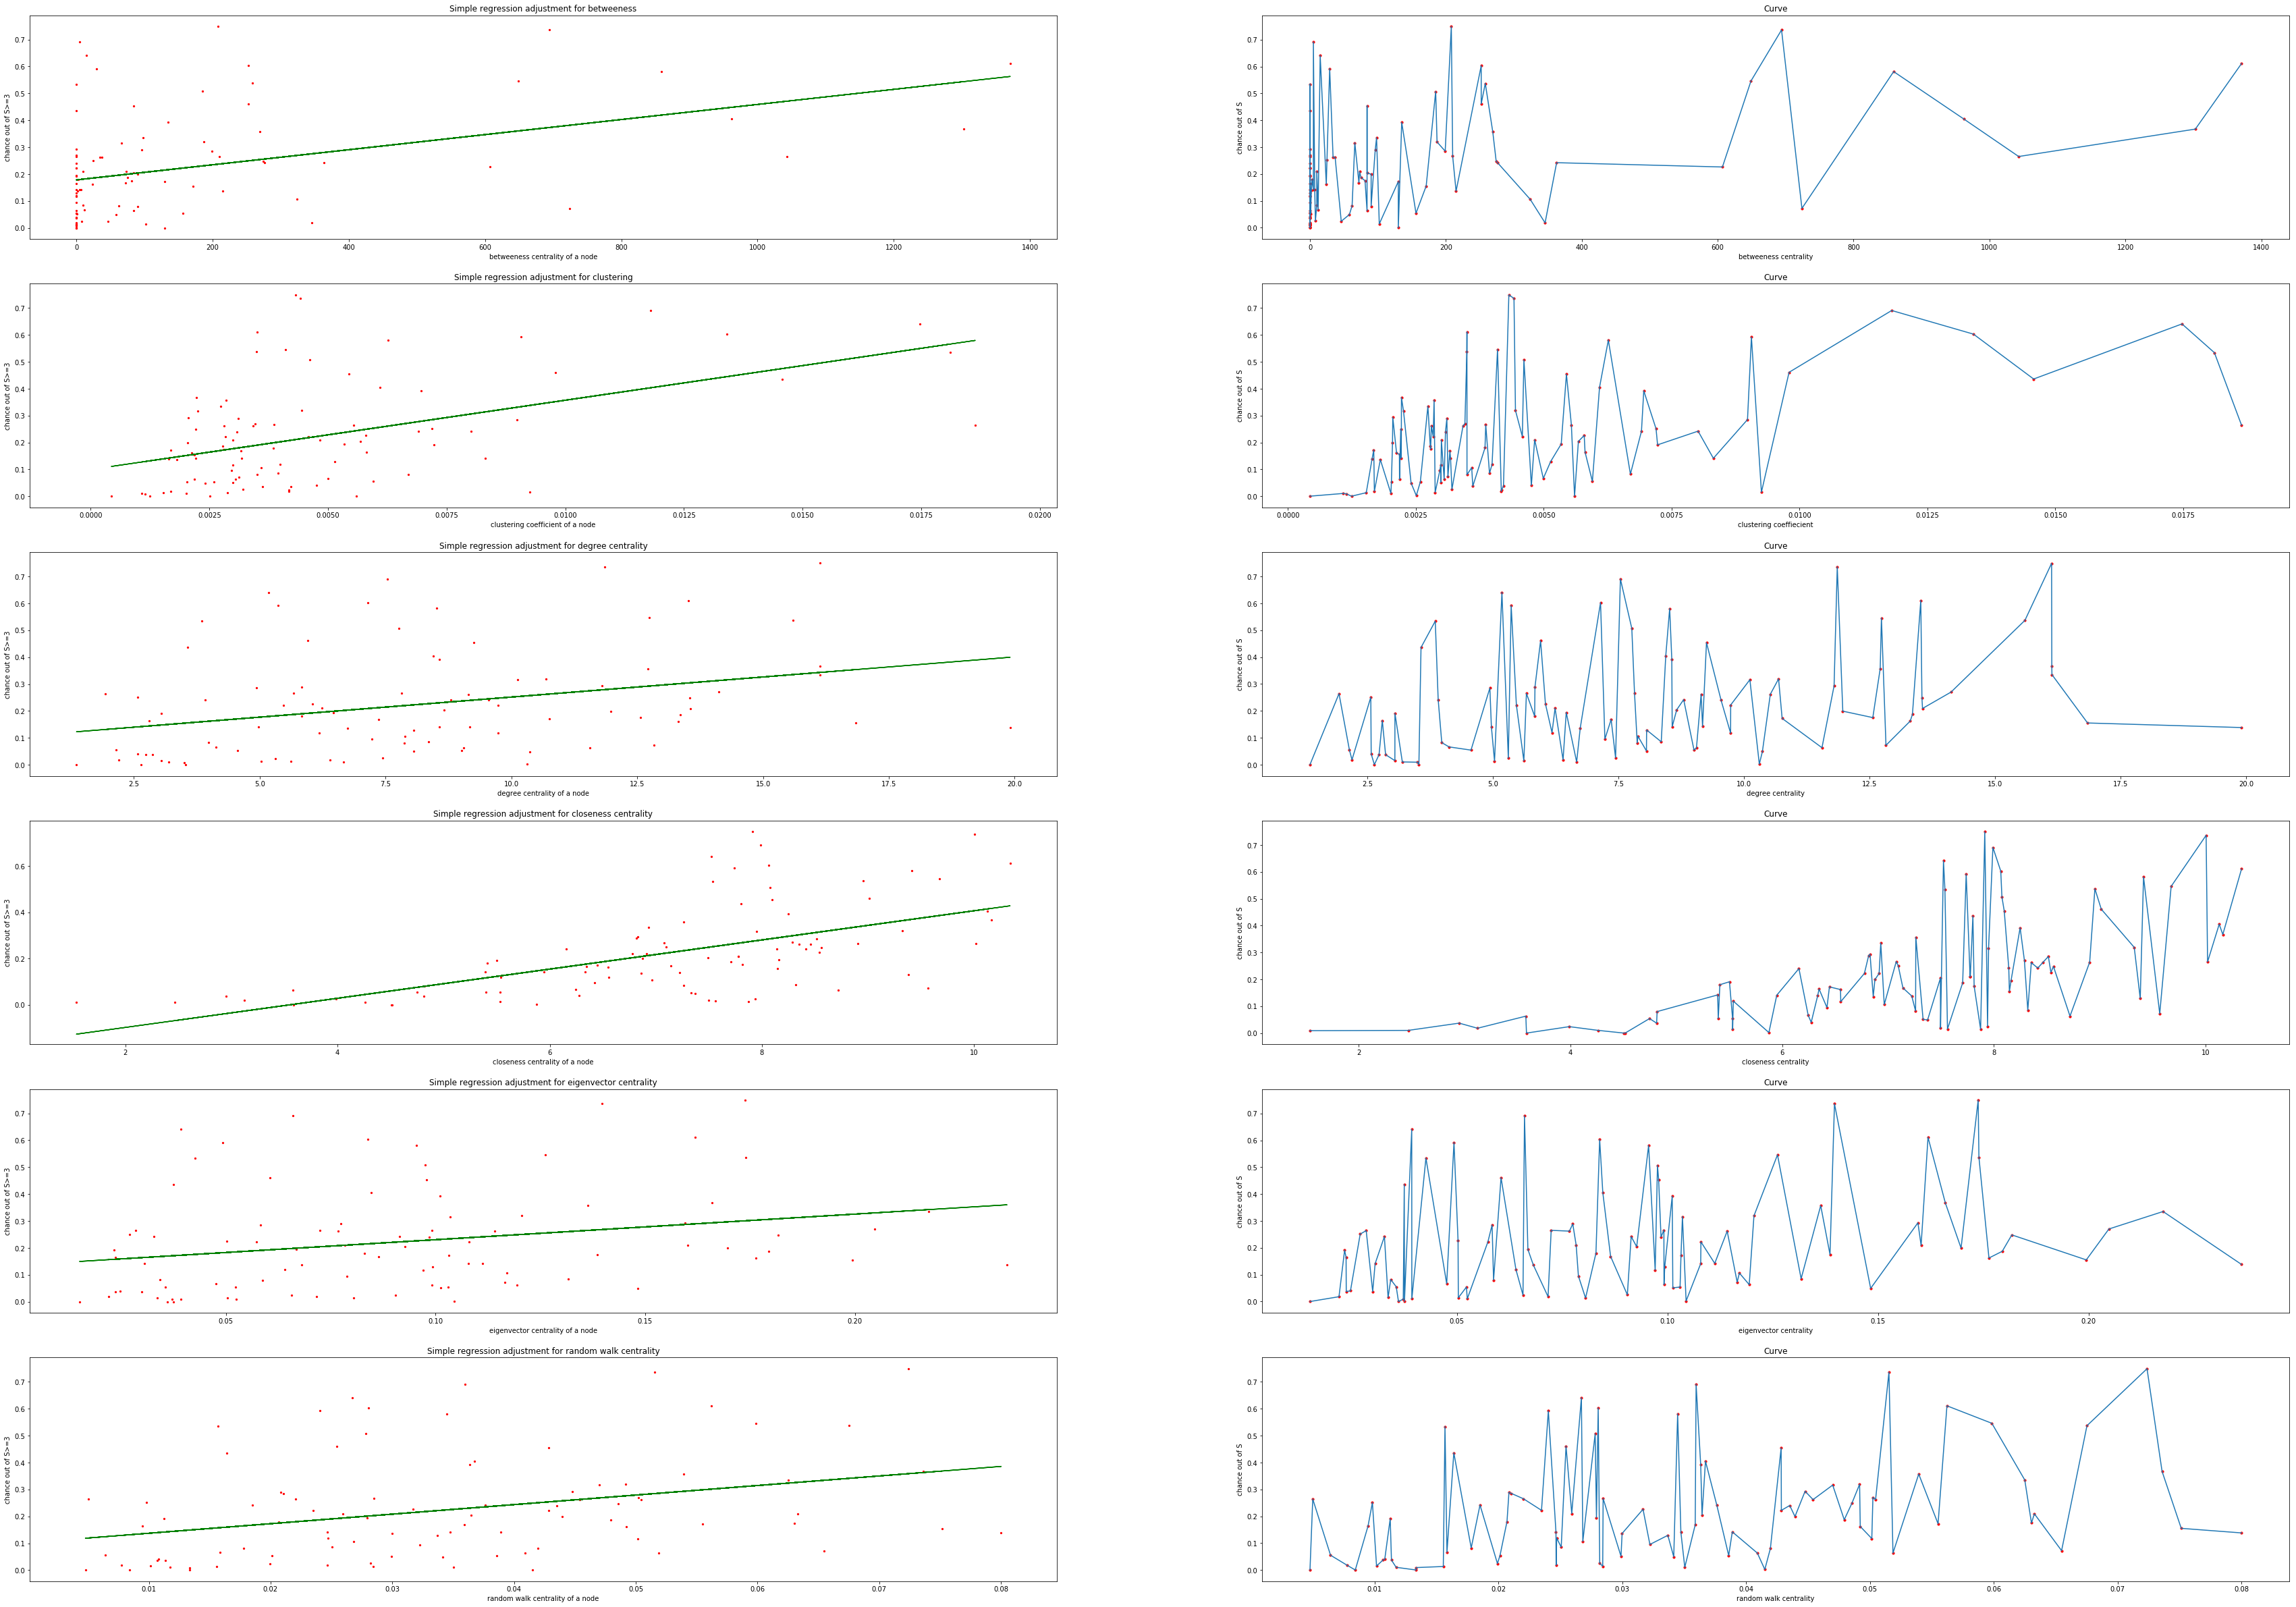

In [18]:
plt.figure(figsize=(60,50)) 

a=7
plt.subplot(a,2,1)
plt.scatter(b_c_df['between'],b_c_df['chance'],s=5,color='red')
plt.plot(b,Y_b,'green')
plt.title('Simple regression adjustment for betweeness')
plt.ylabel('chance out of S>=3')
plt.xlabel('betweeness centrality of a node')

plt.subplot(a,2,2)
b_c_df=b_c_df.sort_values(by='between')
plt.plot(b_c_df['between'],b_c_df['chance'])
plt.scatter(b_c_df['between'],b_c_df['chance'],color='red',s=10)
plt.xlabel('betweeness centrality')
plt.ylabel('chance out of S')
plt.title('Curve')

#plt.figure(figsize=(20,10)) 

plt.subplot(a,2,3)
plt.scatter(b_c_df['cluster'],b_c_df['chance'],s=5,color='red')
plt.plot(c,Y_c,'green')
plt.title('Simple regression adjustment for clustering')
plt.ylabel('chance out of S>=3')
plt.xlabel('clustering coefficient of a node')

plt.subplot(a,2,4)
b_c_df=b_c_df.sort_values(by='cluster')
plt.plot(b_c_df['cluster'],b_c_df['chance'])
plt.scatter(b_c_df['cluster'],b_c_df['chance'],color='red',s=10)
plt.xlabel('clustering coeffiecient')
plt.ylabel('chance out of S')
plt.title('Curve')


plt.subplot(a,2,5)
plt.scatter(b_c_df['d_centrality'],b_c_df['chance'],s=5,color='red')
plt.plot(d,Y_d,'green')
plt.title('Simple regression adjustment for degree centrality')
plt.ylabel('chance out of S>=3')
plt.xlabel('degree centrality of a node')

plt.subplot(a,2,6)
b_c_df=b_c_df.sort_values(by='d_centrality')
plt.plot(b_c_df['d_centrality'],b_c_df['chance'])
plt.scatter(b_c_df['d_centrality'],b_c_df['chance'],color='red',s=10)
plt.xlabel('degree centrality')
plt.ylabel('chance out of S')
plt.title('Curve')

plt.subplot(a,2,7)
plt.scatter(b_c_df['close'],b_c_df['chance'],s=5,color='red')
plt.plot(cl,Y_cl,'green')
plt.title('Simple regression adjustment for closeness centrality')
plt.ylabel('chance out of S>=3')
plt.xlabel('closeness centrality of a node')

plt.subplot(a,2,8)
b_c_df=b_c_df.sort_values(by='close')
plt.plot(b_c_df['close'],b_c_df['chance'])
plt.scatter(b_c_df['close'],b_c_df['chance'],color='red',s=10)
plt.xlabel('closeness centrality')
plt.ylabel('chance out of S')
plt.title('Curve')

plt.subplot(a,2,9)
plt.scatter(b_c_df['eigen'],b_c_df['chance'],s=5,color='red')
plt.plot(e,Y_e,'green')
plt.title('Simple regression adjustment for eigenvector centrality')
plt.ylabel('chance out of S>=3')
plt.xlabel('eigenvector centrality of a node')

plt.subplot(a,2,10)
b_c_df=b_c_df.sort_values(by='eigen')
plt.plot(b_c_df['eigen'],b_c_df['chance'])
plt.scatter(b_c_df['eigen'],b_c_df['chance'],color='red',s=10)
plt.xlabel('eigenvector centrality')
plt.ylabel('chance out of S')
plt.title('Curve')

plt.subplot(a,2,11)
plt.scatter(b_c_df['walk'],b_c_df['chance'],s=5,color='red')
plt.plot(w,Y_w,'green')
plt.title('Simple regression adjustment for random walk centrality')
plt.ylabel('chance out of S>=3')
plt.xlabel('random walk centrality of a node')

plt.subplot(a,2,12)
b_c_df=b_c_df.sort_values(by='walk')
plt.plot(b_c_df['walk'],b_c_df['chance'])
plt.scatter(b_c_df['walk'],b_c_df['chance'],color='red',s=10)
plt.xlabel('random walk centrality')
plt.ylabel('chance out of S')
plt.title('Curve')


Najlepsze wyniki dla harmonic centrality (R^2= 0.6)- 7 wykres oraz closeness centrality R^2=0.35 (ale to i tak kiepski wynik) wykres 4

Text(0.5,1,'Curve')

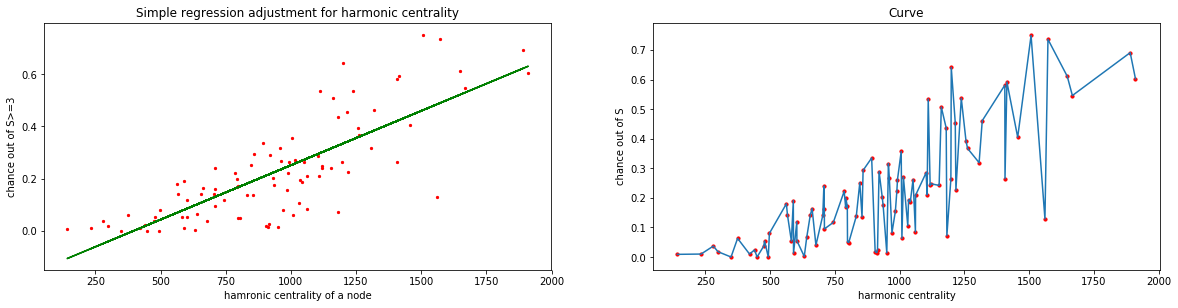

In [19]:
plt.figure(figsize=(20,10)) 

b=2
plt.subplot(b,2,1)
plt.scatter(b_c_df['harmonic'],b_c_df['chance'],s=5,color='red')
plt.plot(h,Y_h,'green')
plt.title('Simple regression adjustment for harmonic centrality')
plt.ylabel('chance out of S>=3')
plt.xlabel('hamronic centrality of a node')

plt.subplot(b,2,2)
b_c_df=b_c_df.sort_values(by='harmonic')
plt.plot(b_c_df['harmonic'],b_c_df['chance'])
plt.scatter(b_c_df['harmonic'],b_c_df['chance'],color='red',s=10)
plt.xlabel('harmonic centrality')
plt.ylabel('chance out of S')
plt.title('Curve')

Text(0.5,1,'Curve')

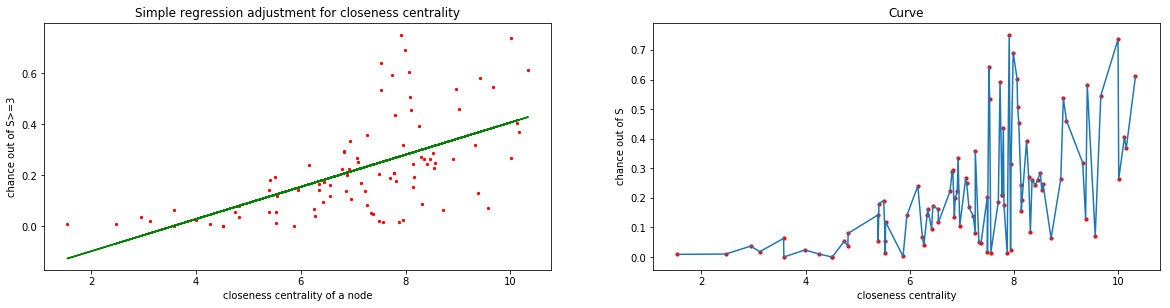

In [20]:
plt.figure(figsize=(20,10)) 

plt.subplot(b,2,1)
plt.scatter(b_c_df['close'],b_c_df['chance'],s=5,color='red')
plt.plot(cl,Y_cl,'green')
plt.title('Simple regression adjustment for closeness centrality')
plt.ylabel('chance out of S>=3')
plt.xlabel('closeness centrality of a node')

plt.subplot(b,2,2)
b_c_df=b_c_df.sort_values(by='close')
plt.plot(b_c_df['close'],b_c_df['chance'])
plt.scatter(b_c_df['close'],b_c_df['chance'],color='red',s=10)
plt.xlabel('closeness centrality')
plt.ylabel('chance out of S')
plt.title('Curve')

In [21]:
from statsmodels.formula.api import ols
model = ols("chance ~ k8 + harmonic", b_c_df).fit() #to chyba najlepsza opcja, ale trzeba się 
#zastanowić nad korelacją tych zmiennych
model1 = ols("chance ~ k8", b_c_df).fit()
model2 = ols("chance ~ harmonic", b_c_df).fit()

In [22]:
model.summary() #K8+HARMONIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 chance   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     190.8
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           6.58e-33
Time:                        10:33:32   Log-Likelihood:                 98.564
No. Observations:                  92   AIC:                            -191.1
Df Residuals:                      89   BIC:                            -183.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0502      0.027     -1.854      0.067      -0.104       0.004
k8             0.0013      0.000      9.237      0.000       0.001       0.002
harmonic       0.0001   4.05e-05      2.864      0.005    3.55e-05       0.000
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.708
Skew:                          -0.160   Prob(JB):                        0.258
Kurtosis:                       3.778   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#wykresy do modelu z R w folderze w png- całkiem niezły wynik, możliwa korelacja między zmiennymi, 
#to trzeba będzie dopracować...


<Figure size 1440x2160 with 0 Axes>

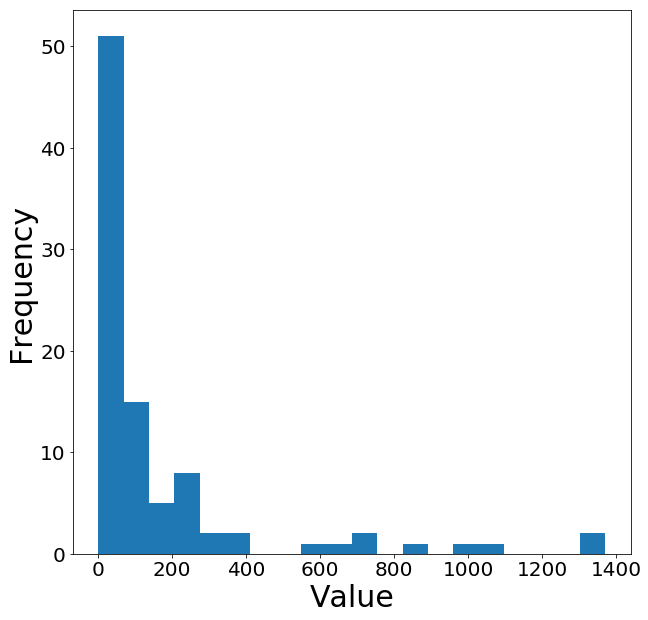

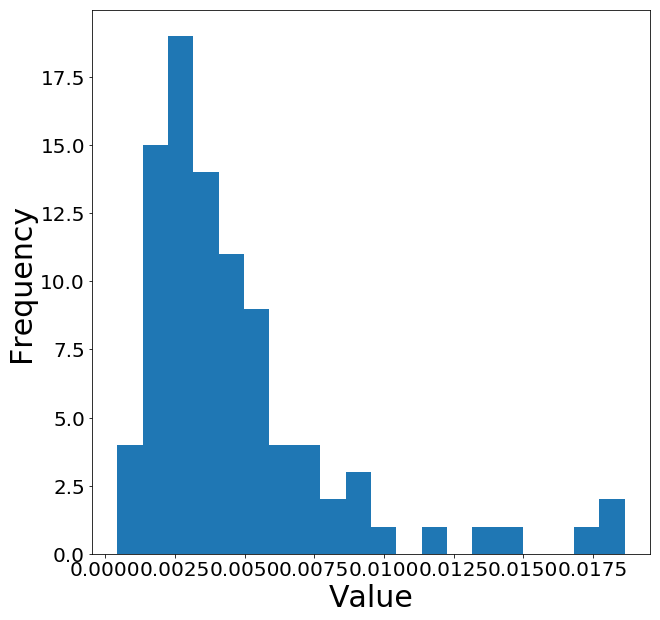

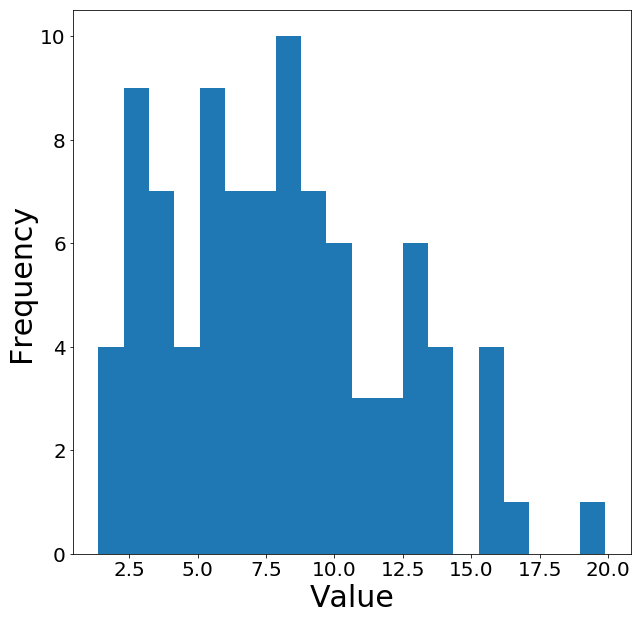

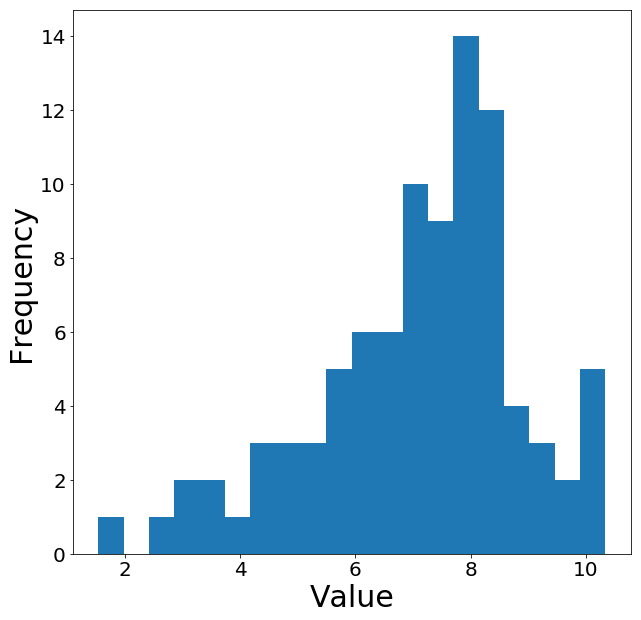

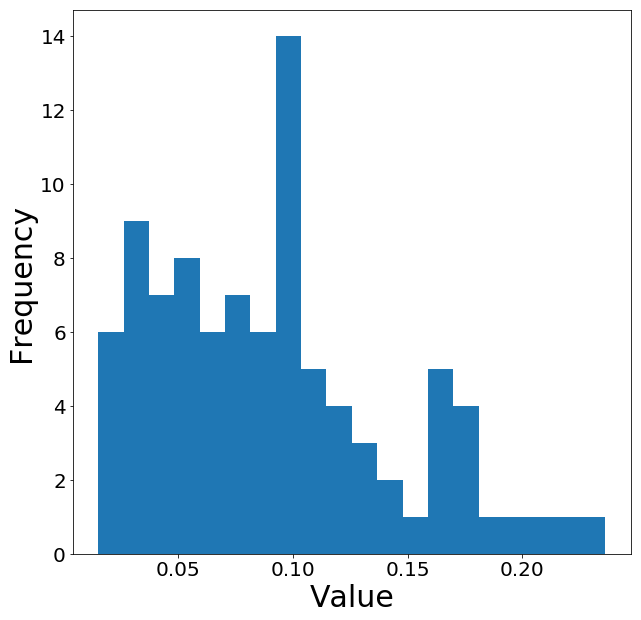

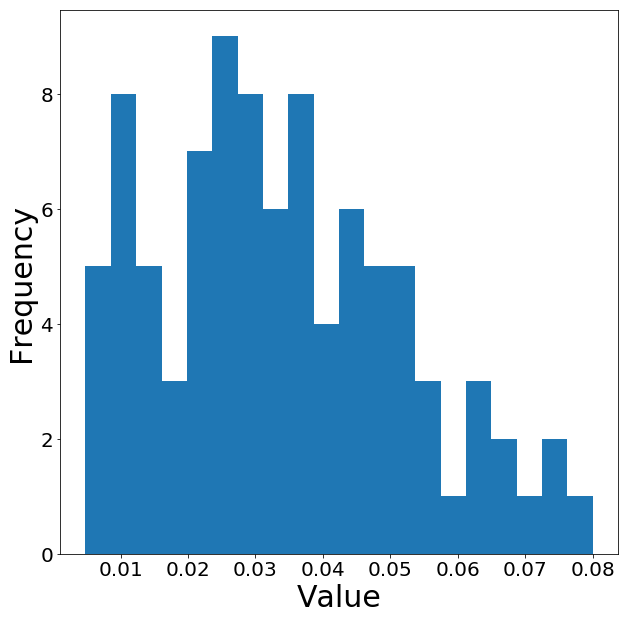

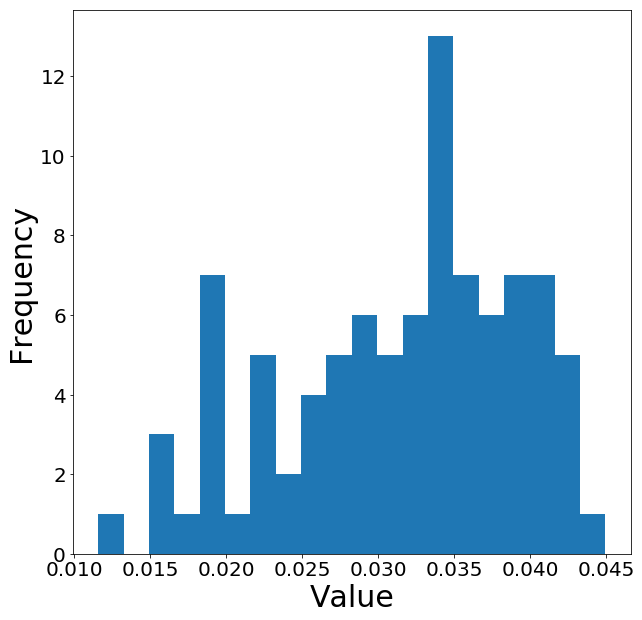

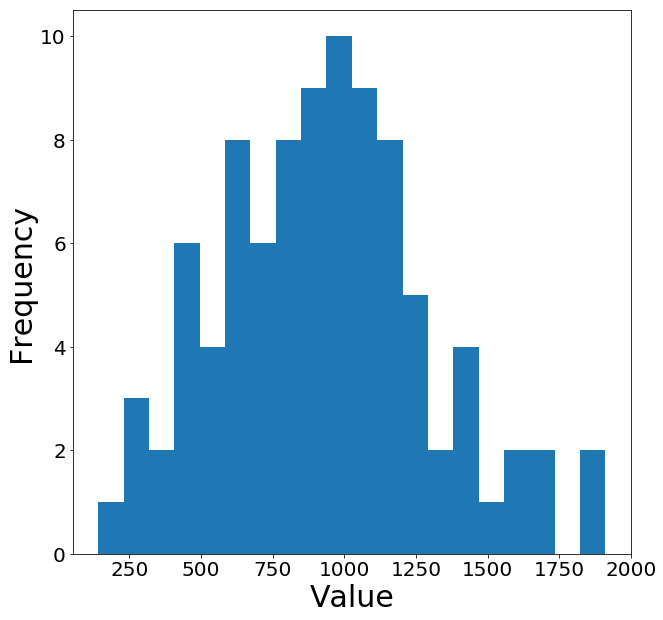

In [18]:
import matplotlib.pyplot as plt
a=5
b=2
i=0
d=['between','cluster','d_centrality','close','eigen','walk','inf','harmonic']
e=['betweeness','clustering coefficient','degree centrality',
                    'closeness','eigen vector','random walk','information','harmonic']
f=30
plt.figure(figsize=(20,30)) 
c=20

for j in d:
    
    plt.figure(figsize=(10,10)) 
    
    #plt.subplot(a,b,i)
    plt.hist(b_c_df[j],bins=c)
    #plt.title('Histogram of '+e[i],fontsize=f)

    plt.xlabel('Value',fontsize=f)
    plt.ylabel('Frequency',fontsize=f)
    plt.xticks(fontsize=f-10)
    plt.yticks(fontsize=f-10)
    
    a=plt.gcf()
    a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/"+d[i]+".eps")
    plt.show()
    
    i+=1

<Figure size 1440x2160 with 0 Axes>

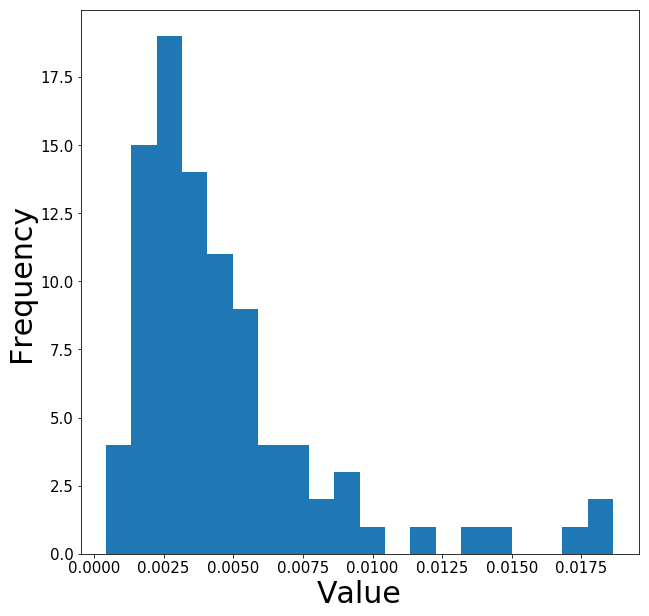

In [20]:
f=30
plt.figure(figsize=(20,30)) 
c=20

j='cluster'
    
plt.figure(figsize=(10,10)) 
    
    #plt.subplot(a,b,i)
plt.hist(b_c_df[j],bins=c)
    #plt.title('Histogram of '+e[i],fontsize=f)

plt.xlabel('Value',fontsize=f)
plt.ylabel('Frequency',fontsize=f)
plt.xticks(fontsize=f-15)
plt.yticks(fontsize=f-15)
    
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/cluster.eps")
plt.show()
    

W sumie ciekawe, ale ta harmonic centrality i closeness centrality mają bardzo podobny rozkład do normalnego, może to ma jakiś wpływa na to ich R^2 w regresji..

In [31]:
b_c_df.to_csv('nodes_char_all_1000.csv', index=False, header=True)


In [5]:
b_c_df=pd.DataFrame({'id':ids,'between':between,'chance':chance,'cluster':clustering,'d_centrality':d_centrality,
                    'close':close,'eigen':eigen,'walk':walk,'inf':inf,'harmonic':harmonic,
                     'k8':k8,'k3':k3,'k5':k5,'k_end':k_end})
zmienne=['between,','cluster','d_centrality',
                    'close','eigen','walk','inf','harmonic']
titles=['betweeness centrality','clustering coefficient','degree centrality','closeness centrality','eigen vector centrality',
       'random walk centrality','information centrality','harmonic centrality']

In [ ]:
for i in zmienne:
    regressor = LinearRegression()  
    b=b_c_df['between'].values.reshape(-1,1)
    Y=b_c_df['chance'].values.reshape(-1,1)
    regressor.fit(b, Y) #training the algorithm
    print('regression formula for betweeness centrality: chance=',regressor.intercept_,'+',regressor.coef_,'*between',
      'coefficient of determination:', regressor.score(b,Y))


Y_b=regressor.intercept_+regressor.coef_*b
    plt.scatter(b_c_df['between'],b_c_df['chance'],s=5,color='red')
    plt.plot(b,Y_b,'green')
    plt.title('Simple regression adjustment for betweeness')
    plt.ylabel('chance out of S>=3')
    plt.xlabel('betweeness centrality of a node')